In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps

In [2]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

In [3]:
def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax

In [4]:
df = pd.read_csv("titanic.csv")

In [5]:
df = df[["Survived", "Pclass", "Sex", "Age", "Ticket", "Fare", "Embarked"]]
df = df.rename(columns={"Pclass": "Class"})
df = df.rename(columns={"Ticket": "TicketID"})
df = df.rename(columns={"Fare": "TicketPrice"})
df = df.rename(columns={"Embarked": "Port"})

In [6]:
pps.score(df, "Sex", "Survived")

{'x': 'Sex',
 'y': 'Survived',
 'ppscore': 0.12919635510576521,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.3838383838383838,
 'model_score': 0.33424786369677695,
 'model': DecisionTreeRegressor()}

In [7]:
matrix = pps.matrix(df)

/Users/matthewmccoy6/opt/anaconda3/envs/spyder-env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/matthewmccoy6/opt/anaconda3/envs/spyder-env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/matthewmccoy6/opt/anaconda3/envs/spyder-env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/matthewmccoy6/opt/anaconda3/envs/spyder-env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 me

In [8]:
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Survived,Survived,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Survived,Class,0.014171,regression,True,mean absolute error,0.691358,0.681561,DecisionTreeRegressor()
2,Survived,Sex,0.521623,classification,True,weighted F1,0.557800,0.788462,DecisionTreeClassifier()
3,Survived,Age,0.000000,regression,True,mean absolute error,11.253263,11.381220,DecisionTreeRegressor()
4,Survived,TicketID,0.000000,classification,True,weighted F1,0.003367,0.000191,DecisionTreeClassifier()
5,Survived,TicketPrice,0.000000,regression,True,mean absolute error,23.509676,26.789577,DecisionTreeRegressor()
6,Survived,Port,0.000011,classification,True,weighted F1,0.608636,0.608641,DecisionTreeClassifier()
7,Class,Survived,0.000000,regression,True,mean absolute error,0.383838,0.420680,DecisionTreeRegressor()
8,Class,Class,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,Class,Sex,0.000000,classification,True,weighted F1,0.557800,0.509074,DecisionTreeClassifier()


<AxesSubplot:title={'center':'PPS matrix'}, xlabel='feature', ylabel='target'>

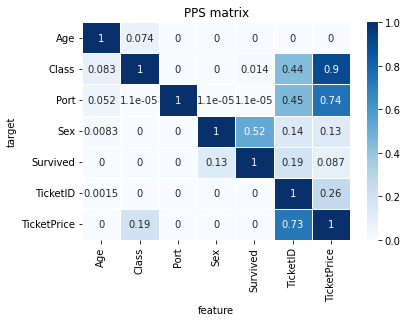

In [9]:
heatmap(matrix)

<AxesSubplot:title={'center':'Correlation matrix'}>

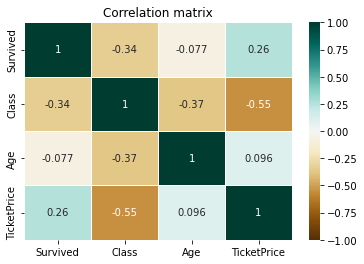

In [10]:
corr_heatmap(df.corr())

In [13]:
matrix.to_csv('PPS_Matrix', encoding ='utf-8')
df.corr().to_csv('Corr_Matrix', encoding = 'utf-8')